<a href="https://colab.research.google.com/github/RailyaR/Railya/blob/main/Sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоё

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('//content/real_estate_data (1).csv', sep = '\t')#Прочитала файл  из папки /datasets/, указав в качестве разделителя знак табуляции \t
#data.head(45)#вывод таблицы, ознакомление с данными
#data.tail(15)
data.info()#Оценка объема данных
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
<b> Комментарий:</b> 
<br> Изначально данные были склеины,поэтому пришлось применить знак табуляции.После изучения таблицы были выявлены пропущенные значения, которые нужно будет устранить. 
</div>

## Предобработка данных

In [5]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['last_price'] = data['last_price'].astype(int)
#data['ceiling_height'].tail()  
data['ceiling_height'].head(30)
#data.info()

0     2.70
1     2.65
2     2.65
3     2.65
4     3.03
5     2.65
6     2.65
7     2.65
8     2.65
9     2.50
10    2.67
11    2.65
12    2.65
13    2.56
14    2.65
15    2.65
16    3.05
17    2.65
18    2.50
19    2.75
20    2.70
21    2.65
22    2.75
23    2.60
24    2.65
25    2.75
26    2.65
27    2.60
28    2.90
29    2.65
Name: ceiling_height, dtype: float64

<div class="alert alert-info">
<b> Комментарий :</b> 
<br> При изучении данных можно заметить, что в колонке под названием ceiling_height, что означает высота потолков появляется значение NaN.Замена на ноль была бы странной, так как высота потолков нулем не может быть, 
а медианное значение может быть . 
</div>

In [6]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

In [7]:

floor = data['floor']

In [8]:
data['floors_total'] = data['floors_total'].fillna(floor).astype(int)

In [9]:
data['floors_total'].value_counts()

5     5792
9     3766
16    1376
12    1368
4     1210
10    1177
25    1075
6      923
17     834
3      672
7      596
14     555
18     508
24     471
8      398
2      385
15     368
23     353
19     342
22     287
20     273
13     232
11     206
27     164
21     162
26     124
1       28
35      24
28      21
36       3
34       1
60       1
29       1
33       1
52       1
37       1
Name: floors_total, dtype: int64

In [10]:
data['living_area'] = data.groupby('rooms')['living_area'].transform('median')
data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].transform('median')
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
#data['living_area'].head(30)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [11]:
data['kitchen_area'].value_counts()

9.04      8047
8.80      7940
9.50      5814
11.10     1180
15.10      326
19.50      105
20.00       59
25.00       12
14.30        8
19.80        3
12.60        2
21.25        2
100.00       1
27.60        1
13.00        1
112.00       1
Name: kitchen_area, dtype: int64

In [12]:

data['is_apartment'] = data['is_apartment'].fillna(0).astype(int)
data['is_apartment'].value_counts()

0    23649
1       50
Name: is_apartment, dtype: int64

<div class="alert alert-info">
<b> Комментарий :</b> 
<br> Апартаменты — это изначально нежилые помещения. Поэтому поменяв булев тип , на int, можно заметить, что 1 обозначет 50 апартаментов, а остальные значения при замене NAN на ноль не подходят под тип апартаменты.
</div>

In [13]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
#data['balcony'].value_counts()
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
#data['parks_around3000'].value_counts()
data['parks_nearest'] = data['parks_nearest'].fillna('')
data['locality_name'] = data['locality_name'].fillna('')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  int64  
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
<b>❌ Комментарий :</b> 
<br> Значения NAN в столбце balcony  и parks_around3000 были заменены на ноль.Так как их просто нет.А в остальных столбцах оставила пропуски.
</div>

In [14]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)
data['ponds_nearest'] = data['ponds_nearest'].fillna('')
data['days_exposition'] = data['days_exposition'].fillna(0).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  int64  
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
<b> Комментарий:</b> 
<br> число водоемов заменила (в радиусе 3 м ) на ноль.  Вполне логично, их просто нет, то есть их ноль.Вот с расстоянием до ближайшего водоема : В данном случае, если я поставлю 0 значит он находится очень близко,поэтому оставила , как пропущенное значение. И такая же история с days_exposition. Не понятно, если поставить ноль, то значит день еще не прошел,но публикация выставлена.
</div>

## Расчёты и добавление результатов в таблицу

#### цену квадратного метра;
#### день недели, месяц и год публикации объявления;
#### этаж квартиры; варианты — первый, последний, другой;
#### соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [15]:
data['price_squarem'] = data['last_price'] / data['total_area']#цену квадратного метра;
data['price_squarem']= data['price_squarem'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squarem
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,45.0,8,0,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,17.6,1,0,...,2,посёлок Шушары,12817.0,18603.0,0,,0,,81,82920
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,30.5,4,0,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,45.0,9,0,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,30.5,13,0,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000


In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')#переводим в формат год месяц день
#создаю столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создаю столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#создаю столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squarem,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,45.0,8,0,...,16028.0,1,482.0,2,755.0,0,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,17.6,1,0,...,18603.0,0,,0,,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,30.5,4,0,...,13933.0,1,90.0,2,574.0,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,0,...,6800.0,2,84.0,3,234.0,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,30.5,13,0,...,8098.0,2,112.0,1,48.0,121,100000,1,6,2018


In [17]:
data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [18]:
def floor_categ(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == 60:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
data['floor_categ'] = data.apply(floor_categ, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squarem,weekday_exposition,month_exposition,year_exposition,floor_categ
0,20,13000000,108.0,2019-03-07,3,2.70,16,45.0,8,0,...,1,482.0,2,755.0,0,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,17.6,1,0,...,0,,0,,81,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,30.5,4,0,...,1,90.0,2,574.0,558,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,0,...,2,84.0,3,234.0,424,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,30.5,13,0,...,2,112.0,1,48.0,121,100000,1,6,2018,другой


In [19]:
# соотношения жилой плозади к общей
data['area'] = data['living_area'] / data['total_area']

#отношения площади кухни к общей
data['kit_area_total'] = data['kitchen_area'] / data['total_area']
data['floor_categ'] = data.apply(floor_categ, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_squarem,weekday_exposition,month_exposition,year_exposition,floor_categ,area,kit_area_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,45.0,8,0,...,2,755.0,0,120370,3,3,2019,другой,0.416667,0.087963
1,7,3350000,40.4,2018-12-04,1,2.65,11,17.6,1,0,...,0,,81,82920,1,12,2018,первый,0.435644,0.223762
2,10,5196000,56.0,2015-08-20,2,2.65,5,30.5,4,0,...,2,574.0,558,92785,3,8,2015,другой,0.544643,0.157143
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,0,...,3,234.0,424,408176,4,7,2015,другой,0.283019,0.059748
4,2,10000000,100.0,2018-06-19,2,3.03,14,30.5,13,0,...,1,48.0,121,100000,1,6,2018,другой,0.305000,0.088000


## Исследовательский анализ данных

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

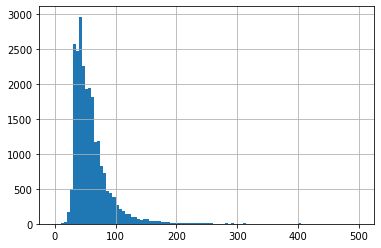

In [20]:
data['total_area'].hist(bins = 100,range=(0,500))

<div class="alert alert-info">
<b>❌ Комментарий:</b> 
<br> Рассматривая гистограмму можно увидеть, что пик приходится гду-то на 40 м^2, потом постепенно пик идет на спад. Есть квартиры и больше 200 м^2, и чуть больше 5 м^2, но их достаточно мало. 
</div>

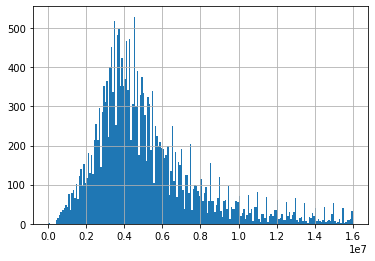

In [21]:
data['last_price'].hist(bins = 200,range=(0, 16000000))

По графику наблюдается резкий подьем, где-то на 0.4 *10^7 приходится пик. И потом постепенный спад цены 

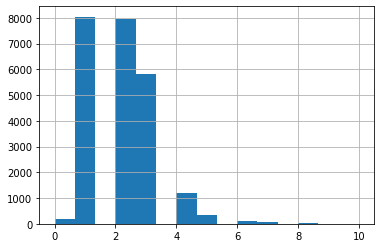

In [22]:
data['rooms'].hist(bins = 15,range=(0,10))

<div class="alert alert-info">
<b>❌ Комментарий:</b> 
<br> Пик приходится от 0 до 2, и потом пик постпенно спадает. Даже 8 комнат есть, но кажется это выбросы. А вот ноль, это сдудия или выбросы.
</div>

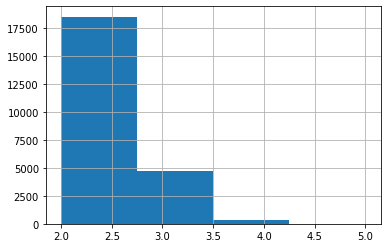

In [23]:
data['ceiling_height'].hist(bins = 4,range=(2,5))

<div class="alert alert-info">
<b>❌ Комментарий :</b> 
<br> Высота потолка: пик приходится между 2 до 2.5, а вот больше 4 скорее всего это выбросы 
</div>

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

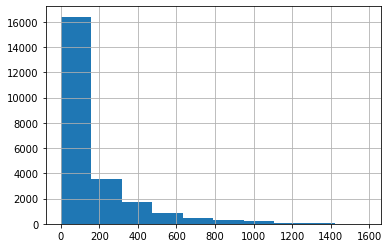

In [24]:
data['days_exposition'].hist()

In [25]:
name_stat = data.pivot_table(index = 'first_day_exposition', values ='days_exposition',aggfunc = ['mean','median'])
#print(name_stat.value_counts().head(10))
name_stat

,mean,median
,days_exposition,days_exposition
first_day_exposition,,
2014-11-27,827.736842,1002.0
2014-11-29,591.000000,591.0
2014-12-04,994.500000,994.5
2014-12-05,581.000000,581.0
2014-12-08,736.875000,822.5
...,...,...
2019-04-29,0.054054,0.0
2019-04-30,0.148148,0.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fbef98a2fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbef98aafd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbef98ba050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbef98b2ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbef98a2590>,
  <matplotlib.lines.Line2D at 0x7fbef98aaa90>]}

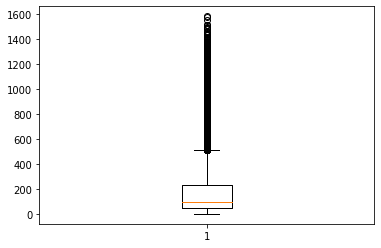

In [26]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])

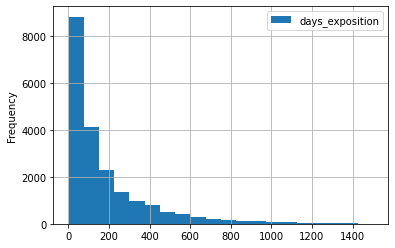

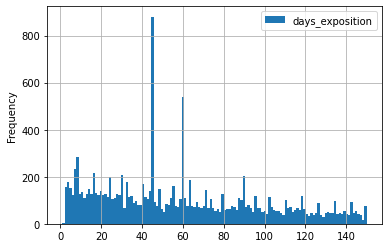

In [27]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 20, grid = True, range = (1,1500))
data.plot(y = 'days_exposition', kind = 'hist', bins = 130, grid = True, range = (1,150))

In [28]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [29]:

data[data['days_exposition']!=0]['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
1021      1
1362      1
1105      1
795       1
971       1
Name: days_exposition, Length: 1141, dtype: int64

<div class="alert alert-info">
<b>❌ Комментарий:</b> 
<br>  Среднее значение - 180 дней, а медиана - 95 дней. Также было обнаружены аномалии на гистограме  и методом value_counts показал их. 45, 60, 7, 30, 90 днях - это наиболее популярное дни(от публикации до снятия)
</div>

In [30]:
data[data['days_exposition']==45]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_squarem,weekday_exposition,month_exposition,year_exposition,floor_categ,area,kit_area_total
78,9,4350000,37.0,2018-02-22,1,2.65,19,17.6,6,0,...,0,,45,117567,3,2,2018,другой,0.475676,0.244324
89,9,2500000,63.0,2018-10-25,3,2.50,5,45.0,4,0,...,0,,45,39682,3,10,2018,другой,0.714286,0.150794
110,6,3850000,72.3,2017-09-29,2,2.65,3,30.5,2,0,...,0,,45,53250,4,9,2017,другой,0.421853,0.121715
153,12,4350000,55.0,2017-05-21,2,2.57,9,30.5,2,0,...,0,,45,79090,6,5,2017,другой,0.554545,0.160000
158,15,3100000,47.3,2017-11-07,2,2.65,5,30.5,2,0,...,0,,45,65539,1,11,2017,другой,0.644820,0.186047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2900000,43.4,2018-01-11,2,2.65,5,30.5,1,0,...,2,397.0,45,66820,3,1,2018,первый,0.702765,0.202765
23613,4,3950000,52.0,2018-03-04,3,2.65,5,45.0,2,0,...,0,,45,75961,6,3,2018,другой,0.865385,0.182692
23670,9,2450000,45.6,2018-02-08,1,2.80,9,17.6,2,0,...,0,,45,53728,3,2,2018,другой,0.385965,0.198246
23679,0,2500000,35.0,2017-12-08,1,2.65,9,17.6,4,0,...,0,,45,71428,4,12,2017,другой,0.502857,0.258286


<div class="alert alert-info">
<b>❌ Комментарий :</b> 
<br>  Судя по данной таблице никаких особенностей я не обнаружила, по этому скорее всего это аномали
</div>

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [31]:
#убираем аномалии
data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')




{'boxes': [<matplotlib.lines.Line2D at 0x7fbef9588710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbef958b7d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbef9593810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbef95932d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbef9588d10>,
  <matplotlib.lines.Line2D at 0x7fbef958b290>]}

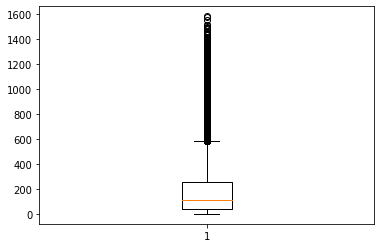

In [32]:
#строим диаграмму размаха
plt.boxplot(data['days_exposition'])

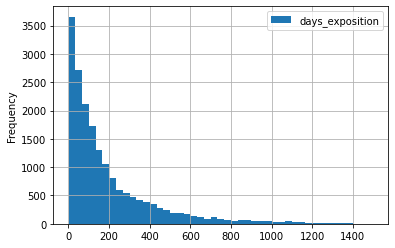

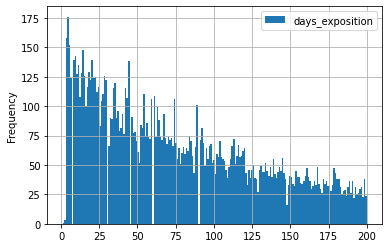

In [33]:
#гистограммы
data.plot(y = 'days_exposition', kind = 'hist', bins = 45, grid = True, range = (1,1500))
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid = True, range = (1,200))

In [34]:

#среднее значение, медиана и межквартильный размах

data['days_exposition'].describe()

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [35]:
data['days_exposition'].value_counts()

4       176
3       158
5       152
14      148
9       143
       ... 
1553      1
793       1
1434      1
1231      1
971       1
Name: days_exposition, Length: 1136, dtype: int64

<div class="alert alert-info">
<b> Комментарий :</b> 
<br>  после удаления аномалий можно заметить, что медиана и среднее значение тоже изменились. 
</div>

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [36]:
data_total_area_price = data.pivot_table(index=['last_price'], values = 'total_area', aggfunc=['mean', 'count', 'median'])
data_total_area_price.head(15)
#Зависимость цены от площади 

,mean,count,median
,total_area,total_area,total_area
last_price,,,
12190,109.000000,1,109.00
430000,54.000000,1,54.00
450000,40.633333,3,42.00
470000,42.750000,2,42.75
480000,32.000000,1,32.00
490000,34.550000,2,34.55
500000,41.333333,3,38.00
520000,30.000000,1,30.00


In [37]:
data['last_price'].corr(data['total_area'])

0.643336867963286

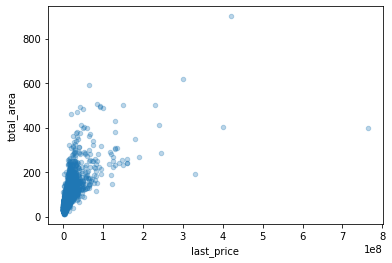

In [38]:
data.plot.scatter(x='last_price',
                         y='total_area',
                         alpha=0.3);

<div class="alert alert-info">
<b> Комментарий :</b> 
<br>  Корреляция  оказалась 0.64, достаточна хорошая корреляция для того чтобы понять, что существует явная зависимость между ценной и площадью. Это даказывает и график рассеивания.
</div>

In [39]:
data_rooms_price = data.pivot_table(index=[ 'rooms'], values ='last_price'  , aggfunc=['mean', 'count', 'median'])
data_rooms_price
#Зависимость цены от числа комнат

,mean,count,median
,last_price,last_price,last_price
rooms,,,
0,2.929289e+06,155,2700000
1,3.797659e+06,6520,3584500
2,5.445274e+06,6191,4700000
3,7.996355e+06,4359,6100000
4,1.319267e+07,871,8900000
5,2.511703e+07,232,13020000
6,3.707213e+07,69,19000000
7,6.191371e+07,35,25000000


In [40]:
data['last_price'].corr(data[ 'rooms'])

0.35446279279857373

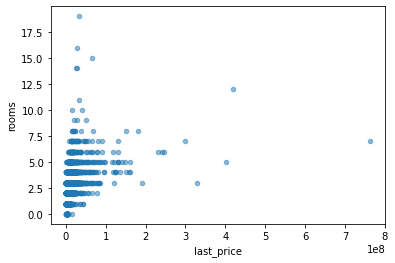

In [41]:
data.plot.scatter(x='last_price',
                         y= 'rooms',
                         alpha=0.5);

In [42]:
data['rooms'].value_counts()

1     6520
2     6191
3     4359
4      871
5      232
0      155
6       69
7       35
8       10
9        3
14       2
10       2
15       1
11       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [43]:
data_cityCenters_nearest_price = data.pivot_table(index=['cityCenters_nearest'], values = 'last_price', aggfunc=['mean', 'count', 'median'])
data_cityCenters_nearest_price.columns = ['mean', 'count', 'median']
data_cityCenters_nearest_price.sort_values( 'median', ascending = False)
#Зависимость цены от расстояния от центра

,mean,count,median
cityCenters_nearest,,,
3956.0,393500000.0,2,393500000.0
1197.0,330000000.0,1,330000000.0
6235.0,245000000.0,1,245000000.0
5297.0,170380900.0,6,210435000.0
3794.0,180000000.0,1,180000000.0
...,...,...,...
5238.0,1800000.0,1,1800000.0
41626.0,1800000.0,1,1800000.0
60223.0,1800000.0,1,1800000.0


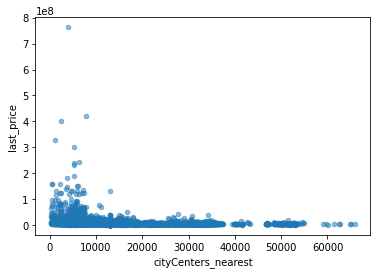

In [44]:
data.plot.scatter(x='cityCenters_nearest',
                         y='last_price',
                        
                         alpha=0.5);

In [45]:
data['last_price'].corr(data['cityCenters_nearest'])

-0.17792452736337586

<div class="alert alert-info">
<b>
 По графику видно, что, чем ближе к центру, тем цена выше.
</div>

In [46]:
data_floor_price = data.pivot_table(index=['floor_categ'], values = 'last_price', aggfunc=['mean', 'count', 'median'])
data_floor_price.columns = ['mean', 'count', 'median']
data_floor_price

,mean,count,median
floor_categ,,,
другой,6.473267e+06,13633,4700000
первый,4.558953e+06,2218,3850000


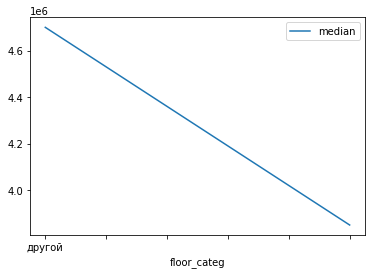

In [47]:
data_floor_price.plot(y='median')

<div class="alert alert-info">
<b> По медиане видно,что на первом этаже цены ниже.
</div>

In [48]:
data_weekday_exposition_price = data.pivot_table(index=['weekday_exposition'], values = 'last_price', aggfunc=['mean', 'count', 'median'])
data_weekday_exposition_price.columns = ['mean', 'count', 'median']
data_weekday_exposition_price
#зависимость цены от дня недели 

,mean,count,median
weekday_exposition,,,
0,6.306265e+06,2754,4540000
1,6.175742e+06,3259,4650000
2,6.541309e+06,3059,4600000
3,6.437042e+06,3418,4600000
4,6.127191e+06,3204,4500000
5,6.934796e+06,1476,4500000
6,6.066993e+06,1284,4475000


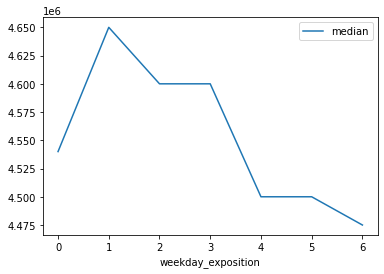

In [49]:
data_weekday_exposition_price.plot(y='median')

<div class="alert alert-info">
<b> График удивил, именно в начале недели наблюдается повшение цен, но ближе к выходным цены падают.Т.е снижается цена. Я не могу понять с чем это свяно.Ну это навряд ли имеет такое объяснение:"на выходных люди добреют и снижают цену" . Хотя может присутствовать психологический момент
</div>

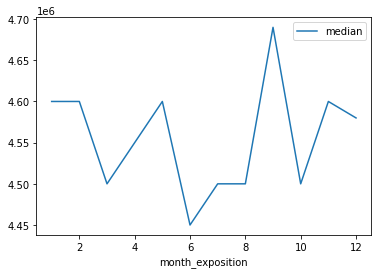

In [50]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values ='last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
#зависимость цены от месяца 

<div class="alert alert-info">
<b> примерно в сентябре происходит повышение цен(возможно это из-за того что заканчивается сезон отпусков), но почему происходит понижение цен в июне, возможно это сезон отпусков.
</div>

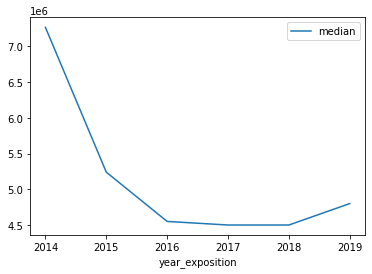

In [51]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values ='last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
#зависимость цены от года

<div class="alert alert-info">
<b>Так если судить с реальным миром, то в 2014 году произошел кризис, обвал рубля, поэтому цены подскачили. Ближе к 2016 происходит нормализование цен, да и к таму же, скорее всего, произошла переиндексация цен.
</div>

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [52]:
pivot_table_locality_name_price_squarem = data.pivot_table(index = 'locality_name', values ='price_squarem', aggfunc = ['mean', 'count'])
pivot_table_locality_name_price_squarem.columns = ['mean', 'count']
pivot_table_locality_name_price_squarem = pivot_table_locality_name_price_squarem.sort_values('count', ascending = False).head(10)
pivot_table_locality_name_price_squarem

,mean,count
locality_name,,
Санкт-Петербург,112341.585146,12414
посёлок Мурино,85660.480851,470
посёлок Шушары,78208.718663,359
Всеволожск,68611.645902,305
Пушкин,102690.208481,283
Колпино,75144.663004,273
деревня Кудрово,92233.886792,265
посёлок Парголово,89777.348659,261
Гатчина,67322.813278,241


In [53]:
#самая высокая стоимость
pivot_table_locality_name_price_squarem[pivot_table_locality_name_price_squarem['mean'] == pivot_table_locality_name_price_squarem['mean'].max()]

,mean,count
locality_name,,
Санкт-Петербург,112341.585146,12414


In [54]:
#самая высокая стоимость
pivot_table_locality_name_price_squarem[pivot_table_locality_name_price_squarem['mean'] == pivot_table_locality_name_price_squarem['mean'].min()]

,mean,count
locality_name,,
Выборг,56982.606742,178


<div class="alert alert-info">
<b> Самая высокая стоимость за квадратный метр в Петербурге, а низкая в Выборг
</div>

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [55]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

,price_squarem
cityCenters_nearest_km,
0,177211.791045
1,151626.793296
2,145240.538136
3,126584.609254
4,135551.253857
5,145788.356655
6,142960.106742
7,142761.938462
8,117749.239216


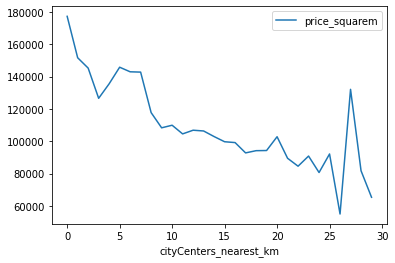

In [56]:
pivot_table_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'price_squarem', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

<div class="alert alert-info">
<b> график сильно меняется на 5 км.
</div>

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [57]:
pivot_table_km_centr = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <=5')

In [58]:
pivot_table_km_centr_rooms = pivot_table_km_centr.pivot_table(index = 'rooms', values ='last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_km_centr_rooms.columns = ['mean', 'count', 'median']
pivot_table_km_centr_rooms

,mean,count,median
rooms,,,
0,5.485714e+06,7,3200000
1,6.383056e+06,313,5950000
2,9.320054e+06,599,7700000
3,1.424676e+07,671,9700000
4,1.706018e+07,321,11403209
5,3.001204e+07,162,14200000
6,3.482812e+07,51,19000000
7,6.457267e+07,30,25250000
8,5.579875e+07,8,21045000


In [59]:
pivot_table_km_centr['rooms'].corr(pivot_table_km_centr['last_price'])

0.30316166467741024

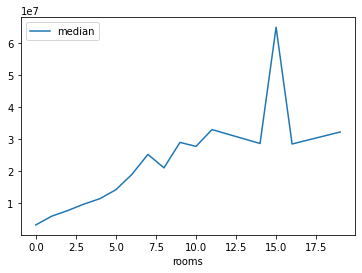

In [60]:
pivot_table_km_centr_rooms.plot(y = 'median')

<div class="alert alert-info">
<b> с повышение числа комнат увечивается и цена, пик приходится 15 комнатной квартире, потом идет на спад.Но смотря на корреляцию зависимость очень маленькая 
</div>

In [61]:
pivot_table_km_ceiling_height = pivot_table_km_centr.pivot_table(index = 'ceiling_height', values ='last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_km_ceiling_height.columns = ['mean', 'count', 'median']
pivot_table_km_ceiling_height.sort_values( 'median', ascending = False)

,mean,count,median
ceiling_height,,,
3.85,1.599840e+08,1,159984000
4.70,1.200000e+08,1,120000000
6.00,1.190000e+08,1,119000000
4.90,1.154900e+08,1,115490000
4.65,9.150000e+07,1,91500000
...,...,...,...
2.71,5.149500e+06,2,5149500
2.77,5.966667e+06,3,4500000
4.19,4.450000e+06,1,4450000


In [62]:
pivot_table_km_centr['ceiling_height'].corr(pivot_table_km_centr['last_price'])

0.06799631218503543

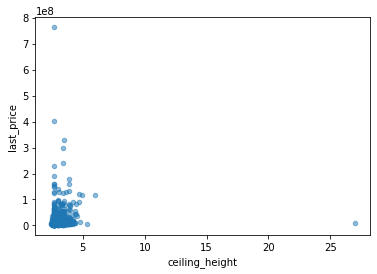

In [63]:
pivot_table_km_centr.plot.scatter(x='ceiling_height',
                         y='last_price',
                        
                         alpha=0.5);

<div class="alert alert-info">
<b> Судя по корреляции зависимости нет
</div>


In [64]:
pivot_table_km_centr_total_area = pivot_table_km_centr.pivot_table(index = 'total_area', values ='last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_km_centr_total_area.columns = ['mean', 'count', 'median']
pivot_table_km_centr_total_area.sort_values( 'median', ascending = False)

,mean,count,median
total_area,,,
400.0,763000000.0,1,763000000.0
401.0,401300000.0,1,401300000.0
618.0,300000000.0,1,300000000.0
410.0,240000000.0,1,240000000.0
500.0,230000000.0,1,230000000.0
...,...,...,...
15.5,2450000.0,1,2450000.0
12.0,2400000.0,1,2400000.0
138.7,2200000.0,1,2200000.0


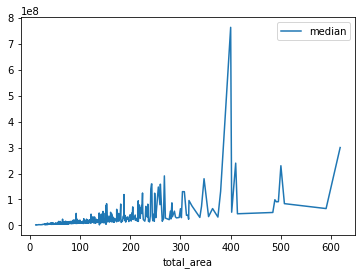

In [65]:
pivot_table_km_centr_total_area.plot(y = 'median')

In [66]:
pivot_table_km_centr['total_area'].corr(pivot_table_km_centr['last_price'])

0.5980026454962003

<div class="alert alert-info">
<b>Зависимость небольшая, но она есть. С увеличением площади - увеличивается и цена,пик приходится примерно на 400м в кв., но потом происходит спад.
</div>

In [67]:
pivot_table_km_centr_floor = pivot_table_km_centr.pivot_table(index = 'floor', values ='last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_km_centr_floor.columns = ['mean', 'count', 'median']
pivot_table_km_centr_floor.sort_values( 'median', ascending = False)

,mean,count,median
floor,,,
17,5.949500e+07,2,59495000.0
25,2.770000e+07,1,27700000.0
15,3.290400e+07,4,26900000.0
19,2.304783e+07,9,25490000.0
13,2.612600e+07,6,21453004.0
18,2.179697e+07,4,17343936.0
12,1.993214e+07,10,14630105.5
16,1.480869e+07,4,13015545.5
23,1.299500e+07,2,12995000.0


In [68]:
pivot_table_km_centr['floor'].corr(pivot_table_km_centr['last_price'])

0.13903129935292935

<div class="alert alert-info">
<b>Корреляция очень маленькая, зависимости практически нет, это доказывает и таблица. Что мы наблюдаем: первый этаж также как и в общих данных(имеею ввиде, когда мы не рассматривали только центр) имеет самую низкую цену с ростом этажей цена растет, но не прапорционально. 
</div>

-0.03446559384355378

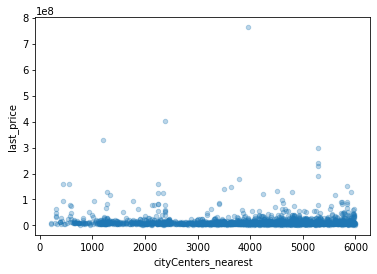

In [69]:
pivot_table_km_centr.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

pivot_table_km_centr['cityCenters_nearest'].corr(pivot_table_km_centr['last_price'])

<div class="alert alert-info">
<b>Как и ожидалось зависимости никакой, так как выборка сделана по центру 
</div>

In [70]:
pivot_table_km_centr_year = pivot_table_km_centr.pivot_table(index = 'year_exposition', values ='last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_km_centr_year.columns = ['mean', 'count', 'median']
pivot_table_km_centr_year.sort_values( 'median', ascending = False)

,mean,count,median
year_exposition,,,
2014,2.572357e+07,22,20200000
2015,1.725497e+07,238,10120000
2016,1.437322e+07,373,9200000
2017,1.533793e+07,871,8950000
2018,1.268902e+07,589,8721680
2019,1.404655e+07,77,8385000


In [71]:
pivot_table_km_centr['last_price'].corr(pivot_table_km_centr['year_exposition'])

-0.0502506478127571

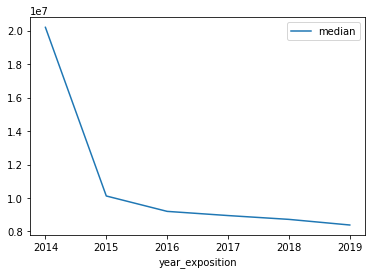

In [72]:
pivot_table_km_centr_year.plot(y = 'median')

здесь ситуация протекала сама по себе и, допустим, как квартиры были в центре Питера дорогие, так и остались. Года на это не оказали влияния. 

In [73]:
pivot_table_km_centr_month = pivot_table_km_centr.pivot_table(index = 'month_exposition', values ='last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_km_centr_month.columns = ['mean', 'count', 'median']
pivot_table_km_centr_month.sort_values( 'median', ascending = False)

,mean,count,median
month_exposition,,,
1,1.484968e+07,128,9900000
9,1.677375e+07,212,9700000
2,1.587364e+07,234,9445000
11,1.384472e+07,229,9300000
5,1.424473e+07,135,9200000
7,1.548578e+07,183,9000000
12,1.655992e+07,147,8999000
8,1.413620e+07,166,8850000
3,1.366125e+07,189,8721680


In [74]:
pivot_table_km_centr['last_price'].corr(pivot_table_km_centr['month_exposition'])

-0.0050164690852111445

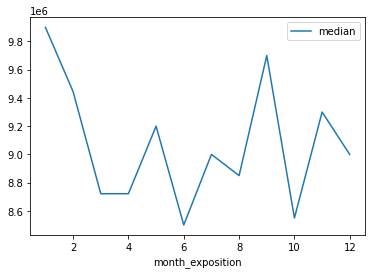

In [75]:
pivot_table_km_centr_month.plot(y = 'median')

<div class="alert alert-info">
<b> Корреляция показывает очень низкий результат- это говорит о том, что зависимости нет.Что мы наблюдаем по таблице и графику: Самая высокая цена держится в начале года, потом идет на спад и повышение цен происходит в сентябре, как и прошлой выборке(общей) 
</div>

<div class="alert alert-info">
<b> Была проделана работа над проектом, а именно были удалены и заменены NAN, там где это было необходимо был сменем тип данных для удобной работы. Были изучены, как различные факторы влияют на стоимость квартиры. А именно:
    Зависимость площади квартиры от цены в моменте снятия с публикации -корреляция составила 65%.
    С увеличением площади - увеличивается и цена,пик приходится примерно на 400м в кв., но потом происходит спад.
    На первом этаже квартиры обходятся дешевле, чем на остальных этажах
    В 2014 году наблюдается повышение цен на квартиры, но ближе к 2019 наблюдается спад
    был выявлен центр города, он находится в радиусе около 5 км 
</div>

<div class="alert alert-info">
<b>❌ Мне кажется при анализе нужно учитывать также и сегментацию рынка.По графику цены подали к 2019 году, но по факту некоторые квартиры могли только дорожать.Мы не учитывали инфляцию в том числе.Нужно обратить внимания на пропуски, не всегда помогает исключительно меддианные данные.В некоторых случаях, такие как,болкон или пруд,нужно поставить 0,так как их просто нет.Также нужно быть внимательными к выбросам
</div>